# Visualising Earnings Based On College Majors

In this project we will be looking at the database from the American Community Survey which documents the job outcomes of students who graduated between 2010 and 2012.

### Importing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.columns

Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')

Here is a breif description of the columns in the dataset.

- Major_code - Major code.
- Major - Major description.
- Total - Total number of people with major.
- Men - Male graduates.
- Women - Female graduates.
- Major_category - Category of major.
- ShareWomen - Women as share of total.
- Sample_size - Sample size (unweighted) of full-time.
- Employed - Number employed.
- Full_time - Employed 35 hours or more (in a week)
- Part_time - Employed less than 35 hours (in a week)
- Full_time_year_round - (Employed at least 50 weeks a year and at least 35 hours a week)
- Unemployed - Number of unemployed graduates
- Unemployment rate = Unemployed / (Unemployed + Employed)
- Median - Median salary of full-time, year-round workers.
- P25th & P75th - The 25th and 75th percentiles of earnings
- College jobs - Number with a job requiring a college degree
- Non college jobs - Number with a job not requiring a college degree
- Low_wage_jobs - Number in low-wage service jobs.

In [5]:
#need to use this to allow graphics#
%matplotlib inline

In [6]:
print("There are ", recent_grads.shape[0], " rows and ", recent_grads.shape[1], "columns in this dataset")

There are  173  rows and  21 columns in this dataset


### Cleaning The Dataset

Lets look at any null values in the data

In [7]:
recent_grads.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

4 categories have one row with null values. Lets remove the null row(s).

In [8]:
recent_grads = recent_grads.dropna()

In [9]:
#check its worked
print(recent_grads.isnull().sum())
print("There are ", recent_grads.shape[0], " rows and ", recent_grads.shape[1], "columns in this dataset")

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64
There are  172  rows and  21 columns in this dataset


Great news the null values was actually only one row.

### Summary Graphics

The database is detailed, but its difficult to make comparisons visually from the data, so lets plot some graphs of potentially related variables.

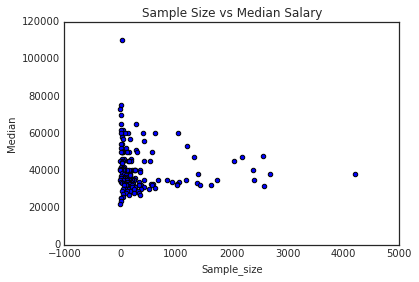

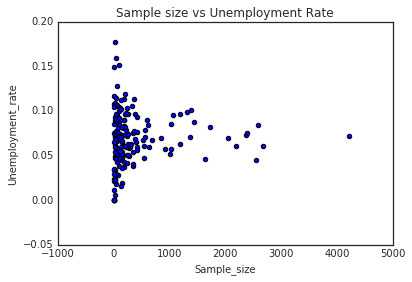

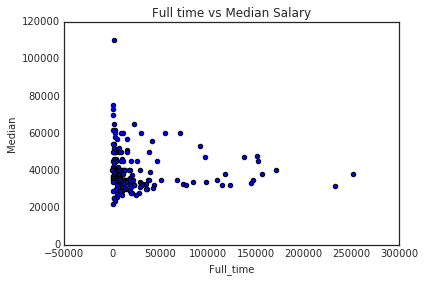

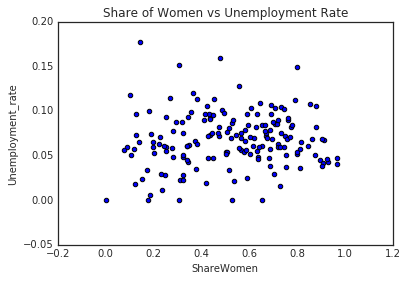

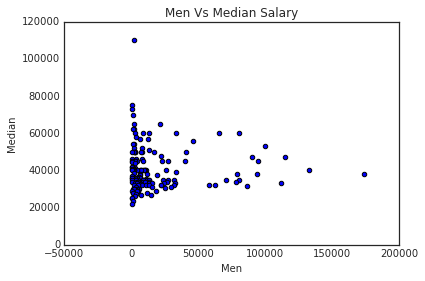

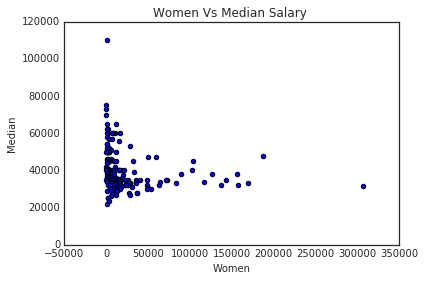

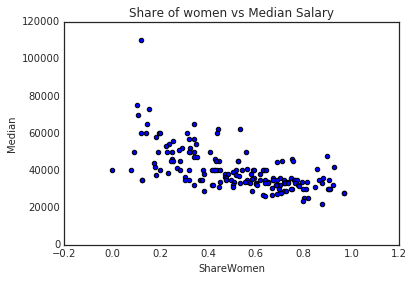

In [10]:
ax = recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'Scatter', title = 'Sample Size vs Median Salary')
ax2 = recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'Scatter', title = 'Sample size vs Unemployment Rate')
ax3 = recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter', title = 'Full time vs Median Salary')
ax4 = recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter', title = 'Share of Women vs Unemployment Rate')
ax5 = recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter', title = 'Men Vs Median Salary')
ax6 = recent_grads.plot(x = 'Women', y= 'Median', kind = 'scatter', title = 'Women Vs Median Salary ')
ax7 = recent_grads.plot(x = 'ShareWomen', y = "Median", kind = 'scatter', title = 'Share of women vs Median Salary')

Sample size vs Median Salary shows that very few graduates earn above $80000 in their full time jobs. Most seem to earn between 20000 and 50000

Sample size vs Unemployment Rate shows that from the degrees that most degrees have unemployement rates of below 10%. There are very few degrees with above 15% unemployment. And very few degrees below 0.25% unemployment.

Full time vs Median Salary shows that although some degrees have numbers employed in full time, these dont necessairly translate to high salary.
Degrees with less than 25000 graduates are broad in the salary outcomes. Clearly a small degree cohort is no measure of how much money will be made.

Share of Women Vs Unemployment Rate shows that the percentage of women taking the a degree class is not correlated with the unemployment rate.

Men Vs Median Salary
and
Women Vs Median Salary show degrees that have high number of graduates are not correlated with high salarys. The highest paying degrees tend to have low graduate numbers. Perhaps these degrees/careers are less interesting or desirable.

Share of Women Vs Median Salary shows that there is a negative correlation. Degrees with higher % share of women tend to make less money.





### Histograms Of The Data

Histograms show frequencies of the data within certain ranges (called 'bins' here. bins=30 means split the data up into 30 bins of the same range sizes) 

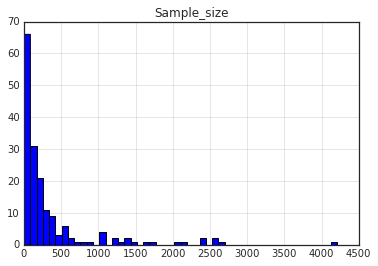

In [11]:
ax8 = recent_grads['Sample_size'].hist(bins =50)
plt.title("Sample_size")

Most degrees have fewer than 250 students currently in the program. There seems to some degrees with >2000 students. Lets see what these are?

In [12]:
high_sample_filter = recent_grads["Sample_size"] > 2000
recent_grads[high_sample_filter][["Major","Major_category","Median","Sample_size"]].sort_values(by="Sample_size", ascending =False)

,Major,Major_category,Median,Sample_size
76,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,38000,4212
77,MARKETING AND MARKETING RESEARCH,Business,38000,2684
145,PSYCHOLOGY,Psychology & Social Work,31500,2584
34,NURSING,Health,48000,2554
93,COMMUNICATIONS,Communications & Journalism,35000,2394
57,GENERAL BUSINESS,Business,40000,2380
35,FINANCE,Business,47000,2189
40,ACCOUNTING,Business,45000,2042


Business shows up twice in the courses with the most current students.
In fact as Major categories Business has 6 of the 8 most populated courses.

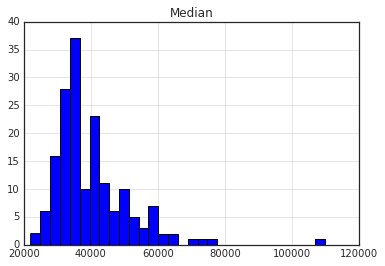

In [13]:
ax9 = recent_grads['Median'].hist(bins =30)
plt.title("Median")

There is almost fairly nice (postively skewed) distribution curve showing here.
There are some courses that have median graduate salarys of above 65000.
Lets see what these are.

In [14]:
high_median_filter = recent_grads["Median"] > 65000
recent_grads[high_median_filter][["Major","Major_category","Median","Unemployment_rate"]].sort_values(by="Median", ascending =False)

,Major,Major_category,Median,Unemployment_rate
0,PETROLEUM ENGINEERING,Engineering,110000,0.018381
1,MINING AND MINERAL ENGINEERING,Engineering,75000,0.117241
2,METALLURGICAL ENGINEERING,Engineering,73000,0.024096
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,70000,0.050125


Engineering degrees dominate the top earning degrees and generally have low unemployment rates

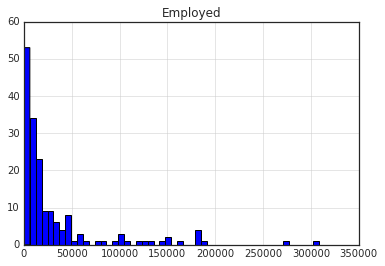

In [15]:
ax10 = recent_grads['Employed'].hist(bins =50)
plt.title("Employed")

There are a few degrees with high number of graduates but most have below 25000 graduates from the program in the database.

What are these courses with high number of graduates?

In [16]:
high_employment_filter = recent_grads["Employed"] > 150000
recent_grads[high_employment_filter][["Major","Major_category","Median","Employed"]].sort_values(by="Employed", ascending =False)

,Major,Major_category,Median,Employed
145,PSYCHOLOGY,Psychology & Social Work,31500,307933
76,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,38000,276234
57,GENERAL BUSINESS,Business,40000,190183
123,BIOLOGY,Biology & Life Science,33400,182295
34,NURSING,Health,48000,180903
93,COMMUNICATIONS,Communications & Journalism,35000,179633
77,MARKETING AND MARKETING RESEARCH,Business,38000,178862
40,ACCOUNTING,Business,45000,165527


Rather unsuprisingly we see the same trend as the sample size. 
Those with large cohort sizes also have high number of graduates from the program.

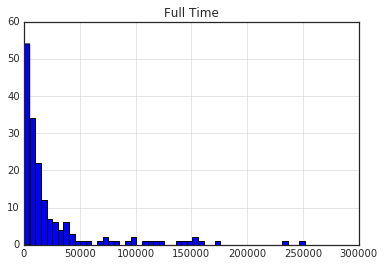

In [17]:
ax11 = recent_grads['Full_time'].hist(bins =50)
plt.title("Full Time")

Again this mostly mirrors that of the sample size and employed categories. 

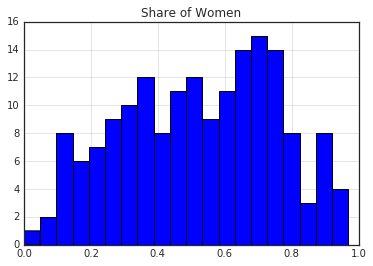

In [18]:
ax12 = recent_grads['ShareWomen'].hist(bins =20)
plt.title("Share of Women")

This Share of women graph is like a flattened normal distribution graph.
How many degrees are there where Share of Women is below 50% or above?

In [19]:
share_of_women_high_filter = recent_grads["ShareWomen"] >= 0.5
share_of_women_high = (recent_grads[share_of_women_high_filter][["ShareWomen"]].count())
print("There are ", share_of_women_high.values , " degrees with 50% or more women")
share_of_women_low_filter = recent_grads["ShareWomen"] < 0.5
share_of_women_low = (recent_grads[share_of_women_low_filter][["ShareWomen"]].count())
print("There are ",share_of_women_low.values, " degrees with less than 50% women")

There are  [96]  degrees with 50% or more women
There are  [76]  degrees with less than 50% women


Most degree types are have more than 50% women. It is important to note this does not say how many people are taking these courses only that more courses are dominated by women than men.

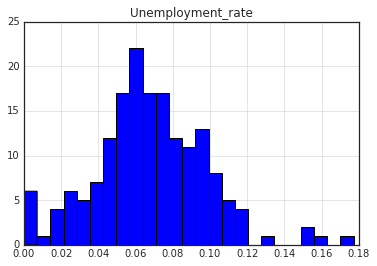

In [20]:
ax13 = recent_grads['Unemployment_rate'].hist(bins =25)
plt.title("Unemployment_rate")

We might expect a normal distribution curve showing very few degrees having high unemployment and very few with very low unemployment.

What we actually see is there are a disproportionately high number of degrees with low employment. Lets see what these are.

In [35]:
low_unemployment_filter = recent_grads["Unemployment_rate"] < 0.01
recent_grads[low_unemployment_filter][["Major","Major_category","Median","Unemployment_rate"]].sort_values(by="Unemployment_rate", ascending =False)

,Major,Major_category,Median,Unemployment_rate
14,ENGINEERING MECHANICS PHYSICS AND SCIENCE,Engineering,58000,0.006334
52,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,42000,0.000000
73,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,40000,0.000000
83,BOTANY,Biology & Life Science,37000,0.000000
112,SOIL SCIENCE,Agriculture & Natural Resources,35000,0.000000
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,34000,0.000000


There is an interesting selection here, but clearly these degrees are in relatively high demand from employers.

Lots of science and engineering is in demand so these are hardly suprising. 
'Education Administration and Supervision' is a suprising entry on this list.


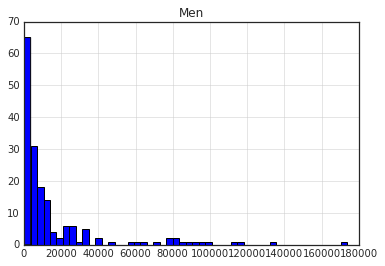

In [22]:
ax14 = recent_grads['Men'].hist(bins =50)
plt.title("Men")

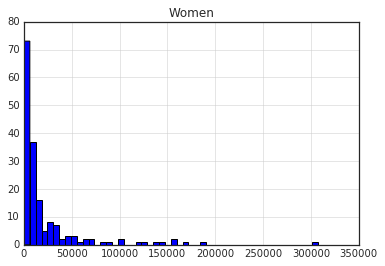

In [23]:
ax15 = recent_grads['Women'].hist(bins =50)
plt.title("Women")

Both of these curves for men and women are similar. The only real difference is in the scales.

Lets see the degrees with the high number of graduates in Men or Women.

In [37]:
high_men_high_women_filter = (recent_grads["Men"] >160000) | (recent_grads["Women"] >160000)
recent_grads[high_men_high_women_filter][["Men","Women","Major","Major_category","Median","Unemployment_rate"]].sort_values(by="Men", ascending =False)

,Men,Women,Major,Major_category,Median,Unemployment_rate
76,173809.0,156118.0,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,38000,0.072218
123,111762.0,168947.0,BIOLOGY,Biology & Life Science,33400,0.070725
145,86648.0,307087.0,PSYCHOLOGY,Psychology & Social Work,31500,0.083811
34,21773.0,187621.0,NURSING,Health,48000,0.044863


Psychology is a hugely popular course. And more women take this course than the top two courses for men combined. Psychology is also hugely popular for Men.

Nursing is far more popular for Women than Men.

Despite this the courses have average unemployment rate so the high supply is not a great issue.

In [24]:
from pandas.plotting import scatter_matrix

This is a scatter matrix relating Sample Size, Median and Unemployment Rate


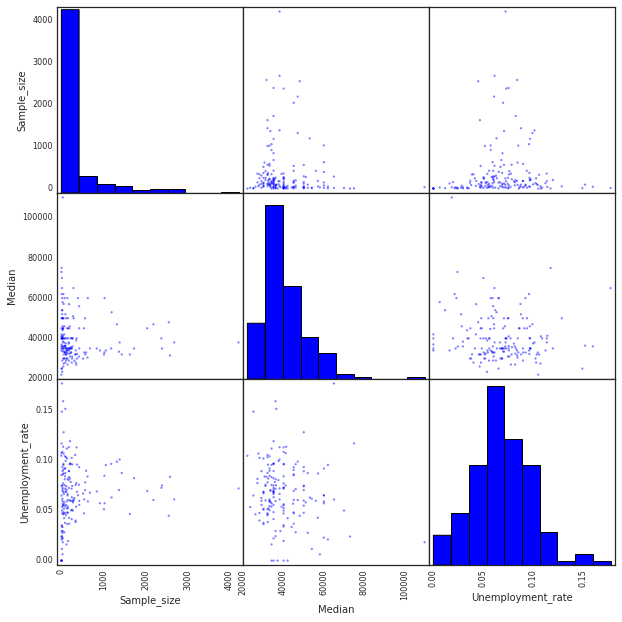

In [41]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))
print("This is a scatter matrix relating Sample Size, Median and Unemployment Rate")

There is no definite correlation between the variables of Sample Size, Median and Unemployment rate.

This is a scatter matrix relating Share of Women, Median and Unemployment Rate


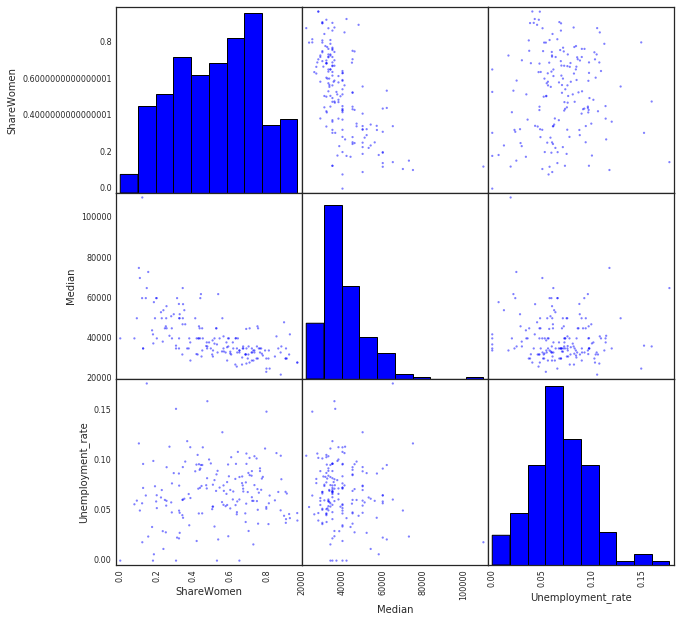

In [55]:
scatter_matrix(recent_grads[['ShareWomen', 'Median', 'Unemployment_rate']], figsize=(10,10))
print("This is a scatter matrix relating Share of Women, Median and Unemployment Rate")

The share of women does not correlate with the unemployment rate, which is surely a good thing. However, a degree course with a low % share of women tends to be a course with a higher median graduate salary.

This of course just shows the correlation between these variables and says nothing about the causation. Could it be high paying degrees are turning down women applicants? Could it be that those degrees are less interesting to women?

### Comparing the top and bottom paying Majors

This is a barh graph showing the share of women in the top 20 Majors


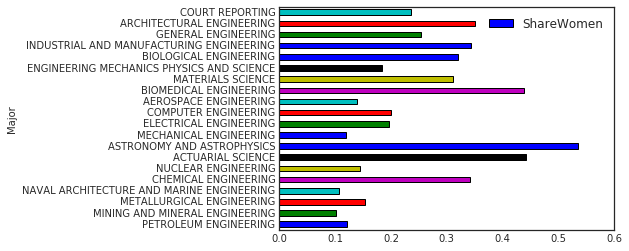

In [47]:
#The dataframe is already sorted from highest paying major to lowest#
recent_grads[:20].plot.barh(x="Major", y="ShareWomen")
print("This is a barh graph showing the share of women in the top 20 Majors")

This is a barh graph showing the share of women in the bottom 20 Majors


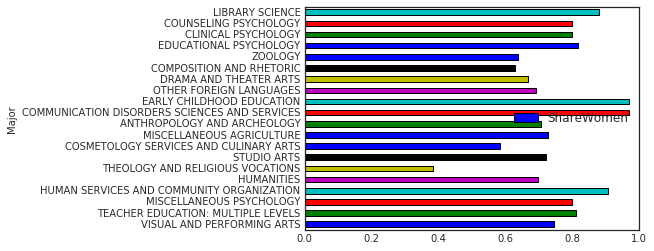

In [52]:
recent_grads[-20:].plot.barh(x="Major", y="ShareWomen")
print("This is a barh graph showing the share of women in the bottom 20 Majors")

Here is another demonstration of how degrees with low share of women tend to be higher paying degrees. 
Engineering is disproportionately represent in terms of the highest earning degrees.

This is a barh graph showing the unemployment rate in the top 20 Majors


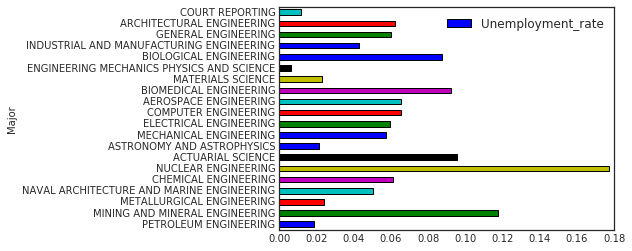

In [54]:
recent_grads[:20].plot.barh(x="Major", y="Unemployment_rate")
print("This is a barh graph showing the unemployment rate in the top 20 Majors")

This is a barh graph showing the unemployment rate in the bottom 20 Majors


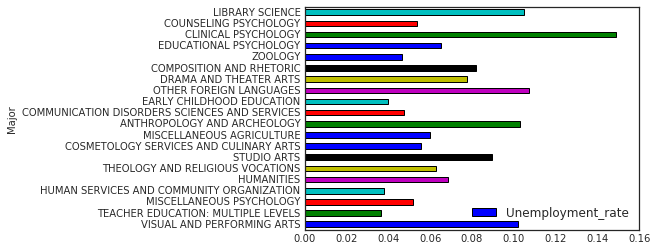

In [53]:
recent_grads[-20:].plot.barh(x="Major", y="Unemployment_rate")
print("This is a barh graph showing the unemployment rate in the bottom 20 Majors")

We see that in general the top 20 paying majors have lower unemployment rates. But there are certainly degrees in the bottom 20 paying majors that are in high demand. 

Nuclear engineering has the highest unemployment rate of all the top and bottom 20 degrees.

### Conclusion
These things are not correlated:
- A degrees popularity vs graduate salary
- A degrees unemployment vs graduate salary
- A degrees share of women vs graduate salary
- A degrees share of women vs unemployment rate.


These things are correlated:
- A degrees share of women vs graduate salary

Other observations:
- Very few degrees have graduate salaries above $80000
- Engineering majors (of multiple kinds) are the highest earning degrees with generally low unemployment rates.
- There are more degrees with more than 50% women than there are not.
- Nursing is far more popular for Women than Men
- We see that in general the top 20 paying majors have lower unemployment rates. But there are certainly degrees in the bottom 20 paying majors that are in high demand (particularly education)
- Nuclear engineering has the highest unemployment rate of all the top and bottom 20 degrees.

It is of note that the correlation does not give us any information about the causation.